In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

# 1. 법정동 코드 가공

In [3]:
locCode = pd.read_excel('../data/법정동코드.xlsx')
locCode.head()

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
0,1100000000,서울특별시,NaN,NaN,NaN,19880423,NaN
1,1111000000,서울특별시,종로구,NaN,NaN,19880423,NaN
2,1111010100,서울특별시,종로구,청운동,NaN,19880423,NaN
3,1111010200,서울특별시,종로구,신교동,NaN,19880423,NaN
4,1111010300,서울특별시,종로구,궁정동,NaN,19880423,NaN


In [4]:
#읍면동이 NaN인 데이터 추출 > 읍면동 제외
locCode = locCode[locCode["읍면동명"].isnull()==True]
locCode.head()

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
0,1100000000,서울특별시,NaN,NaN,NaN,19880423,NaN
1,1111000000,서울특별시,종로구,NaN,NaN,19880423,NaN
89,1114000000,서울특별시,중구,NaN,NaN,19880423,NaN
164,1117000000,서울특별시,용산구,NaN,NaN,19880423,NaN
201,1120000000,서울특별시,성동구,NaN,NaN,19880423,NaN


In [5]:
# 시군구가 NaN이 아닌 데이터 추출 > 시도명 제외
locCode = locCode[locCode["시군구명"].isnull() == False]
locCode.head()

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자
1,1111000000,서울특별시,종로구,NaN,NaN,19880423,NaN
89,1114000000,서울특별시,중구,NaN,NaN,19880423,NaN
164,1117000000,서울특별시,용산구,NaN,NaN,19880423,NaN
201,1120000000,서울특별시,성동구,NaN,NaN,19880423,NaN
219,1121500000,서울특별시,광진구,NaN,NaN,19950301,NaN


In [6]:
# 법정동 코드 컬럼에서 5자리 추출합니다.
# 예) 서울특별시 종로구 > 11000

locCode['지역코드'] = locCode["법정동코드"].astype(str).str[0:5].astype('int64')
locCode.head()

,법정동코드,시도명,시군구명,읍면동명,동리명,생성일자,말소일자,지역코드
1,1111000000,서울특별시,종로구,NaN,NaN,19880423,NaN,11110
89,1114000000,서울특별시,중구,NaN,NaN,19880423,NaN,11140
164,1117000000,서울특별시,용산구,NaN,NaN,19880423,NaN,11170
201,1120000000,서울특별시,성동구,NaN,NaN,19880423,NaN,11200
219,1121500000,서울특별시,광진구,NaN,NaN,19950301,NaN,11215


In [7]:
# 시도명이 서울특별시인 데이터만 추출 후 시도명, 시군구명, 지역코드 컬럼만 추출 

loc = locCode[locCode['시도명']=='서울특별시'][['시도명','시군구명','지역코드']]
loc

,시도명,시군구명,지역코드
1,서울특별시,종로구,11110
89,서울특별시,중구,11140
164,서울특별시,용산구,11170
201,서울특별시,성동구,11200
219,서울특별시,광진구,11215
227,서울특별시,동대문구,11230
238,서울특별시,중랑구,11260
245,서울특별시,성북구,11290
285,서울특별시,강북구,11305
290,서울특별시,도봉구,11320


# 2. 실거래가 데이터 가공

In [8]:
# 실거래가 데이터 불러오기
apt = pd.read_csv('../data/2019년 서울 아파트 실거래가.csv', encoding="cp949")
apt.head()

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번
0,2008,2019,1,7,사직동,"105,000",광화문풍림스페이스본(101동~105동),97.61,11110,10,9
1,2008,2019,1,11,사직동,"162,000",광화문풍림스페이스본(106동),163.33,11110,11,9-1
2,2008,2019,1,19,사직동,"119,000",광화문풍림스페이스본(101동~105동),131.44,11110,13,9
3,2008,2019,1,30,사직동,"119,000",광화문풍림스페이스본(101동~105동),147.31,11110,1,9
4,2004,2019,1,25,내수동,"160,000",경희궁의아침4단지,150.48,11110,14,73


In [9]:
# 데이터 프레임의 컬럼을 확인합니다.
apt.columns

Index(['건축년도', '거래년도', '거래월', '거래일자', '법정동', '거래금액', '아파트이름', '전용면적', '지역코드',
       '층', '지번'],
      dtype='object')

In [10]:
# 데이터 프레임의 크기(차원)을 조회합니다
apt.shape

(68864, 11)

In [11]:
# 불러온 데이터에 NA값이 있는지 조회합니다.
apt.isnull().sum()

건축년도     0
거래년도     0
거래월      0
거래일자     0
법정동      0
거래금액     0
아파트이름    0
전용면적     0
지역코드     0
층        0
지번       0
dtype: int64

In [12]:
# 실거래가 데이터프레임 정보 조회
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68864 entries, 0 to 68863
Data columns (total 11 columns):
건축년도     68864 non-null int64
거래년도     68864 non-null int64
거래월      68864 non-null int64
거래일자     68864 non-null int64
법정동      68864 non-null object
거래금액     68864 non-null object
아파트이름    68864 non-null object
전용면적     68864 non-null float64
지역코드     68864 non-null int64
층        68864 non-null int64
지번       68864 non-null object
dtypes: float64(1), int64(6), object(4)
memory usage: 5.8+ MB


In [13]:
# 거래금액 컬럼의 콤마(,) 제거 후 데이터 타입 변경
apt['거래금액'] = apt['거래금액'].str.replace(',','').astype('int64')
apt.head()

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73


In [14]:
# 실거래가 데이터프레임 정보 조회 (거래금액 컬럼 변경 확인)
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68864 entries, 0 to 68863
Data columns (total 11 columns):
건축년도     68864 non-null int64
거래년도     68864 non-null int64
거래월      68864 non-null int64
거래일자     68864 non-null int64
법정동      68864 non-null object
거래금액     68864 non-null int64
아파트이름    68864 non-null object
전용면적     68864 non-null float64
지역코드     68864 non-null int64
층        68864 non-null int64
지번       68864 non-null object
dtypes: float64(1), int64(7), object(3)
memory usage: 5.8+ MB


In [15]:
# 전용면적(제곱미터)를 평으로 변환(나누기 3.306)하여 전용면적(평) 컬럼 생성 후 소숫점 둘쨰자리까지 표시합니다.
apt['전용면적(평)'] = round(apt['전용면적'] / 3.306, 2)
apt.head()

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평)
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52


In [16]:
# 전용면적을 범주화 하기 위해 전용면적(평) 컬럼을 정수형으로 바꾼 새로운 컬럼을 생성합니다.
apt['전용면적(평)2'] = apt['전용면적(평)'].astype('int64')
apt.head()

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평),전용면적(평)2
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53,29
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40,49
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76,39
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56,44
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52,45


In [17]:
# 아래의 코드를 실행하여 전용면적을 범주화 합니다.
daterange = np.arange(0,(int(max(apt['전용면적(평)2']) / 5) + 2) * 5, 5)
apt['전용면적(평)3'] = pd.cut(apt['전용면적(평)2'], daterange)
apt.head()

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53,29,"(25, 30]"
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40,49,"(45, 50]"
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76,39,"(35, 40]"
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56,44,"(40, 45]"
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52,45,"(40, 45]"


In [18]:
# 범주화된 전용면적의 고유값을 확인합니다.
apt['전용면적(평)3'].unique()

[(25, 30], (45, 50], (35, 40], (40, 45], (0, 5], ..., (65, 70], (55, 60], (60, 65], (80, 85], (75, 80]]
Length: 17
Categories (17, interval[int64]): [(0, 5] < (5, 10] < (10, 15] < (15, 20] ... (65, 70] < (70, 75] < (75, 80] < (80, 85]]

In [19]:
# loc 인덱서를 이용하여 거래월이 1~6인 경우 상반기, 7~12인 경우 하반기의 값을 가지는 컬럼을 생성합니다.
apt.loc[apt['거래월'] <= 6, '반기'] ="상반기"
apt.loc[apt['거래월'] > 6, '반기'] ="하반기"
apt

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3,반기
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53,29,"(25, 30]",상반기
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40,49,"(45, 50]",상반기
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76,39,"(35, 40]",상반기
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56,44,"(40, 45]",상반기
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52,45,"(40, 45]",상반기
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68859,2013,2019,12,30,천호동,14500,하이브2,13.50,11740,11,164-70,4.08,4,"(0, 5]",하반기
68860,2009,2019,12,7,강일동,79750,강일리버파크10단지,84.53,11740,9,695,25.57,25,"(20, 25]",하반기
68861,2009,2019,12,9,강일동,77800,강일리버파크2단지,84.74,11740,4,668,25.63,25,"(20, 25]",하반기
68862,2009,2019,12,25,강일동,80000,강일리버파크7단지,84.83,11740,3,686,25.66,25,"(20, 25]",하반기


In [20]:
# loc 인덱서를 이용하여 거래월이 1~3월인 경우 1분기, 4~6월인경우 2분기,
# 7~9월인경우 3분기, 10~12월인 경우 4분기의 값을 가지는 컬럼을 생성합니다.
apt.loc[apt['거래월'] <= 3, '분기'] = "1분기"
apt.loc[(apt['거래월'] > 3) & (apt['거래월'] <= 6) , '분기'] ="2분기"
apt.loc[(apt['거래월'] > 6) & (apt['거래월'] <= 9) , '분기'] ="3분기"
apt.loc[(apt['거래월'] > 9) & (apt['거래월'] <= 12) , '분기'] ="4분기"
apt

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3,반기,분기
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53,29,"(25, 30]",상반기,1분기
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40,49,"(45, 50]",상반기,1분기
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76,39,"(35, 40]",상반기,1분기
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56,44,"(40, 45]",상반기,1분기
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52,45,"(40, 45]",상반기,1분기
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68859,2013,2019,12,30,천호동,14500,하이브2,13.50,11740,11,164-70,4.08,4,"(0, 5]",하반기,4분기
68860,2009,2019,12,7,강일동,79750,강일리버파크10단지,84.53,11740,9,695,25.57,25,"(20, 25]",하반기,4분기
68861,2009,2019,12,9,강일동,77800,강일리버파크2단지,84.74,11740,4,668,25.63,25,"(20, 25]",하반기,4분기
68862,2009,2019,12,25,강일동,80000,강일리버파크7단지,84.83,11740,3,686,25.66,25,"(20, 25]",하반기,4분기


In [21]:
# 전용면적(평)2 컬럼을 이용하여 평당 거래 금액 컬럼을 생성합니다.

apt['평당거래금액'] = apt['거래금액'] / apt['전용면적(평)2']
apt.head()

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3,반기,분기,평당거래금액
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53,29,"(25, 30]",상반기,1분기,3620.689655
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40,49,"(45, 50]",상반기,1분기,3306.122449
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76,39,"(35, 40]",상반기,1분기,3051.282051
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56,44,"(40, 45]",상반기,1분기,2704.545455
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52,45,"(40, 45]",상반기,1분기,3555.555556


# 3. 데이터 프레임 결합

In [22]:
# 지역 코드를 기준으로 법정동 코드 데이터 프레임과 아파트 실거래가 데이터 프레임을 결합합니다.

df = pd.merge(apt, loc, on="지역코드")
df

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,지역코드,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3,반기,분기,평당거래금액,시도명,시군구명
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,11110,10,9,29.53,29,"(25, 30]",상반기,1분기,3620.689655,서울특별시,종로구
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11110,11,9-1,49.40,49,"(45, 50]",상반기,1분기,3306.122449,서울특별시,종로구
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,11110,13,9,39.76,39,"(35, 40]",상반기,1분기,3051.282051,서울특별시,종로구
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,11110,1,9,44.56,44,"(40, 45]",상반기,1분기,2704.545455,서울특별시,종로구
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,11110,14,73,45.52,45,"(40, 45]",상반기,1분기,3555.555556,서울특별시,종로구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68859,2013,2019,12,30,천호동,14500,하이브2,13.50,11740,11,164-70,4.08,4,"(0, 5]",하반기,4분기,3625.000000,서울특별시,강동구
68860,2009,2019,12,7,강일동,79750,강일리버파크10단지,84.53,11740,9,695,25.57,25,"(20, 25]",하반기,4분기,3190.000000,서울특별시,강동구
68861,2009,2019,12,9,강일동,77800,강일리버파크2단지,84.74,11740,4,668,25.63,25,"(20, 25]",하반기,4분기,3112.000000,서울특별시,강동구
68862,2009,2019,12,25,강일동,80000,강일리버파크7단지,84.83,11740,3,686,25.66,25,"(20, 25]",하반기,4분기,3200.000000,서울특별시,강동구


In [23]:
# 지역 코드 컬럼을 삭제합니다.

df.drop(['지역코드'], axis=1, inplace=True)
df.head()

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3,반기,분기,평당거래금액,시도명,시군구명
0,2008,2019,1,7,사직동,105000,광화문풍림스페이스본(101동~105동),97.61,10,9,29.53,29,"(25, 30]",상반기,1분기,3620.689655,서울특별시,종로구
1,2008,2019,1,11,사직동,162000,광화문풍림스페이스본(106동),163.33,11,9-1,49.40,49,"(45, 50]",상반기,1분기,3306.122449,서울특별시,종로구
2,2008,2019,1,19,사직동,119000,광화문풍림스페이스본(101동~105동),131.44,13,9,39.76,39,"(35, 40]",상반기,1분기,3051.282051,서울특별시,종로구
3,2008,2019,1,30,사직동,119000,광화문풍림스페이스본(101동~105동),147.31,1,9,44.56,44,"(40, 45]",상반기,1분기,2704.545455,서울특별시,종로구
4,2004,2019,1,25,내수동,160000,경희궁의아침4단지,150.48,14,73,45.52,45,"(40, 45]",상반기,1분기,3555.555556,서울특별시,종로구


# 4. 데이터 분석

In [24]:
# 2019년에 거래된 전용면적이 높은 5개의 거래를 출력합니다.
df.sort_values('전용면적', ascending=False).head(5)

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3,반기,분기,평당거래금액,시도명,시군구명
1130,2004,2019,10,18,신당동,240000,벨레어카운티,273.82,5,407-17,82.83,82,"(80, 85]",하반기,4분기,2926.829268,서울특별시,중구
52439,2008,2019,2,12,방배동,255000,라온채,272.74,5,12-36,82.50,82,"(80, 85]",상반기,1분기,3109.756098,서울특별시,서초구
58528,2002,2019,10,28,청담동,500000,이니그마빌2,272.38,5,90-10,82.39,82,"(80, 85]",하반기,4분기,6097.560976,서울특별시,강남구
55493,2008,2019,3,25,청담동,340000,청담동마크노빌,270.25,4,89-12,81.75,81,"(80, 85]",상반기,1분기,4197.530864,서울특별시,강남구
54276,1996,2019,9,19,서초동,225000,트라움하우스2,266.52,2,1495-2,80.62,80,"(75, 80]",하반기,3분기,2812.500000,서울특별시,서초구


In [25]:
# 2019년에 거래된 전용면적이 낮은 5개의 거래를 출력합니다.
df.sort_values('전용면적').head(5)

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3,반기,분기,평당거래금액,시도명,시군구명
2392,1969,2019,10,29,동자동,17300,동자,10.02,-1,19-8,3.03,3,"(0, 5]",하반기,4분기,5766.666667,서울특별시,용산구
45830,2019,2019,6,7,신길동,13500,루나플라체,10.78,12,69-20,3.26,3,"(0, 5]",상반기,2분기,4500.000000,서울특별시,영등포구
45815,2019,2019,6,7,신길동,14000,루나플라체,10.78,14,69-20,3.26,3,"(0, 5]",상반기,2분기,4666.666667,서울특별시,영등포구
45809,2019,2019,6,7,신길동,14000,루나플라체,10.78,7,69-20,3.26,3,"(0, 5]",상반기,2분기,4666.666667,서울특별시,영등포구
45792,2019,2019,6,7,신길동,14000,루나플라체,10.78,11,69-20,3.26,3,"(0, 5]",상반기,2분기,4666.666667,서울특별시,영등포구


In [26]:
# 2019년에 거래된 평당거래금액이 높은 5개의 거래를 출력합니다.
df.sort_values('평당거래금액', ascending=False).head(5)

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3,반기,분기,평당거래금액,시도명,시군구명
59105,1982,2019,11,4,개포동,253000,개포주공 3단지,35.64,4,138,10.78,10,"(5, 10]",하반기,4분기,25300.0,서울특별시,강남구
57983,1982,2019,9,26,개포동,240000,개포주공 1단지,35.64,1,141,10.78,10,"(5, 10]",하반기,3분기,24000.0,서울특별시,강남구
57939,1982,2019,9,7,개포동,210000,개포주공 1단지,35.64,1,141,10.78,10,"(5, 10]",하반기,3분기,21000.0,서울특별시,강남구
57553,1982,2019,8,10,개포동,200000,개포주공 1단지,35.44,2,141,10.72,10,"(5, 10]",하반기,3분기,20000.0,서울특별시,강남구
56369,1982,2019,6,29,개포동,199000,개포주공 1단지,35.87,5,141,10.85,10,"(5, 10]",상반기,2분기,19900.0,서울특별시,강남구


In [27]:
# 2019년에 거래된 평당거래금액이 낮은 5개의 거래를 출력합니다.
df.sort_values('평당거래금액').head(5)

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3,반기,분기,평당거래금액,시도명,시군구명
43668,1975,2019,3,6,시흥동,6500,시흥(817-29),39.83,5,817-29,12.05,12,"(10, 15]",상반기,1분기,541.666667,서울특별시,금천구
40452,1996,2019,3,14,구로동,7000,(743-6),41.35,3,743-6,12.51,12,"(10, 15]",상반기,1분기,583.333333,서울특별시,구로구
41106,1988,2019,6,18,개봉동,12850,길훈,70.67,5,312-38,21.38,21,"(20, 25]",상반기,2분기,611.904762,서울특별시,구로구
28674,1978,2019,5,8,연희동,10000,시민,52.89,1,188-41,16.00,16,"(15, 20]",상반기,2분기,625.000000,서울특별시,서대문구
28678,1978,2019,5,16,연희동,7000,시민,36.76,1,188-41,11.12,11,"(10, 15]",상반기,2분기,636.363636,서울특별시,서대문구


In [28]:
# 2019년 상반기에 거래 금액이 높은 5개의 거래를 출력합니다.
df[df['반기'] == '상반기'].sort_values(by='거래금액', ascending=False).head(5)

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3,반기,분기,평당거래금액,시도명,시군구명
1504,2011,2019,1,10,한남동,840000,한남더힐,244.749,3,810,74.03,74,"(70, 75]",상반기,1분기,11351.351351,서울특별시,용산구
1916,2011,2019,6,14,한남동,820000,한남더힐,244.749,3,810,74.03,74,"(70, 75]",상반기,2분기,11081.081081,서울특별시,용산구
1659,2011,2019,4,18,한남동,730000,한남더힐,243.201,1,810,73.56,73,"(70, 75]",상반기,2분기,10000.000000,서울특별시,용산구
1742,2011,2019,5,16,한남동,695000,한남더힐,243.201,1,810,73.56,73,"(70, 75]",상반기,2분기,9520.547945,서울특별시,용산구
1541,2011,2019,2,11,한남동,660000,한남더힐,240.230,2,810,72.66,72,"(70, 75]",상반기,1분기,9166.666667,서울특별시,용산구


In [29]:
# 2019년 상반기에 거래 금액이 낮은 5개의 거래를 출력합니다.
df[df['반기'] == '상반기'].sort_values(by='거래금액').head(5)

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3,반기,분기,평당거래금액,시도명,시군구명
43668,1975,2019,3,6,시흥동,6500,시흥(817-29),39.83,5,817-29,12.05,12,"(10, 15]",상반기,1분기,541.666667,서울특별시,금천구
6033,1999,2019,4,4,화양동,6900,화양타워,15.81,2,110-37,4.78,4,"(0, 5]",상반기,2분기,1725.000000,서울특별시,광진구
40452,1996,2019,3,14,구로동,7000,(743-6),41.35,3,743-6,12.51,12,"(10, 15]",상반기,1분기,583.333333,서울특별시,구로구
28678,1978,2019,5,16,연희동,7000,시민,36.76,1,188-41,11.12,11,"(10, 15]",상반기,2분기,636.363636,서울특별시,서대문구
108,1997,2019,5,10,명륜3가,7500,(1-102),26.64,3,1-102,8.06,8,"(5, 10]",상반기,2분기,937.500000,서울특별시,종로구


In [30]:
# 2019년 하반기에 거래 금액이 높은 5개의 거래를 출력합니다.
df[df['반기'] == '하반기'].sort_values(by='거래금액', ascending=False).head(5)

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3,반기,분기,평당거래금액,시도명,시군구명
2773,2011,2019,11,12,한남동,713000,한남더힐,241.052,1,810,72.91,72,"(70, 75]",하반기,4분기,9902.777778,서울특별시,용산구
2771,2011,2019,11,11,한남동,710000,한남더힐,240.305,1,810,72.69,72,"(70, 75]",하반기,4분기,9861.111111,서울특별시,용산구
59238,2004,2019,11,28,삼성동,700000,아이파크,226.600,43,87,68.54,68,"(65, 70]",하반기,4분기,10294.117647,서울특별시,강남구
2559,2011,2019,10,7,한남동,694000,한남더힐,240.305,1,810,72.69,72,"(70, 75]",하반기,4분기,9638.888889,서울특별시,용산구
2225,2011,2019,8,13,한남동,690000,한남더힐,240.305,3,810,72.69,72,"(70, 75]",하반기,3분기,9583.333333,서울특별시,용산구


In [31]:
# 2019년 상반기에 거래 금액이 낮은 5개의 거래를 출력합니다.
df[df['반기'] == '하반기'].sort_values(by='거래금액').head(5)

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3,반기,분기,평당거래금액,시도명,시군구명
41903,1995,2019,9,4,구로동,5400,성산E동,21.900,1,801-26,6.62,6,"(5, 10]",하반기,3분기,900.0,서울특별시,구로구
7186,1999,2019,10,15,화양동,7000,화양타워,15.180,2,110-37,4.59,4,"(0, 5]",하반기,4분기,1750.0,서울특별시,광진구
7185,1999,2019,10,15,화양동,7000,화양타워,15.950,2,110-37,4.82,4,"(0, 5]",하반기,4분기,1750.0,서울특별시,광진구
42114,2014,2019,9,26,오류동,7000,썬앤빌,14.064,8,34-13,4.25,4,"(0, 5]",하반기,3분기,1750.0,서울특별시,구로구
41519,2014,2019,7,30,오류동,7250,썬앤빌,14.064,15,34-13,4.25,4,"(0, 5]",하반기,3분기,1812.5,서울특별시,구로구


In [32]:
# 시군구별 재건축 대상(준공 후 20년 이상 30년 이하) 아파트의 수를 출력합니다.
len(df[(df['건축년도'] >= 1990) & (df['건축년도'] <= 2000)]['아파트이름'].unique())

1176

In [33]:
# 시군구명을 기준으로 평균 거래 금액와 총 거래 금액을 계산 후 평균 거래 금액이 높은 순서대로 정렬합니다.
df.groupby(by=['시군구명'])['거래금액'].agg(['sum','mean']).sort_values(by='mean', ascending=False)

,sum,mean
시군구명,,
강남구,782079627,180036.746547
서초구,488475723,165753.553784
용산구,212127387,153938.597242
송파구,648822350,120263.642261
성동구,287361990,96172.018072
광진구,148991868,91913.552128
마포구,239394380,91232.614329
동작구,206281001,85204.874432
양천구,302462534,84251.402228


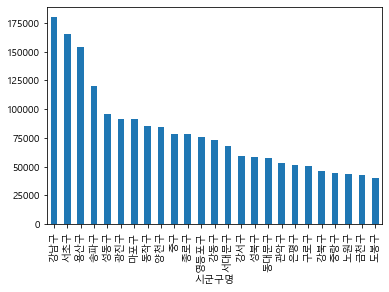

In [34]:
# 시군구명을 기준으로 계산한 평균 거래 금액을 bar차트로 시각화 합니다.
temp = df.groupby(by=['시군구명'])['거래금액'].agg(['sum','mean']).sort_values(by='mean', ascending=False)
temp['mean'].plot(kind='bar')

In [35]:
# 거래월, 시군구명, 법정동을 기준으로 평균 거래 금액을 계산합니다.
df.groupby(by=['거래월','시군구명','법정동'])['거래금액'].agg(['mean']).sort_values(by='mean', ascending=False)

mean
거래월 시군구명 법정동                   
3   용산구   한남동     380000.000000
7   용산구   한남동     326934.782609
1   용산구   한남동     321340.000000
    강남구   압구정동    320785.714286
3   강남구   청담동     320466.666667
...                         ...
12  영등포구  영등포동2가   11600.000000
5   영등포구  영등포동1가   11540.000000
9   영등포구  영등포동3가   10900.000000
5   중구    장충동2가     9300.000000
10  중구    장충동2가     8835.000000

[2988 rows x 1 columns]

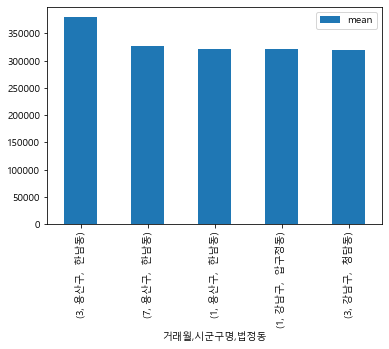

In [36]:
# 상위 5개 지역을 시각화 합니다.
df.groupby(by=['거래월','시군구명','법정동'])['거래금액'].agg(['mean']).sort_values(by='mean', ascending=False).head(5).plot(kind='bar')

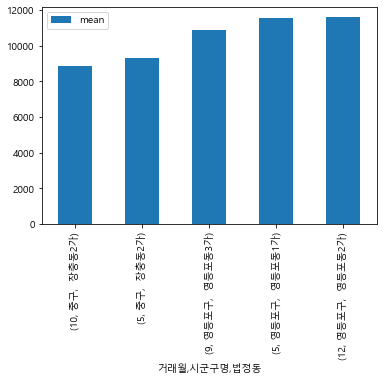

In [37]:
# 하위 5개 지역을 시각화 합니다.
df.groupby(by=['거래월','시군구명','법정동'])['거래금액'].agg(['mean']).sort_values(by='mean').head(5).plot(kind='bar')

In [38]:
# 거래월과 시군구명을 기준으로 아파트 실거래가 건수를 계산 후 내림차순으로 정렬합니다.
df.groupby(by=['거래월', '시군구명']).size().sort_values(ascending=False)

거래월  시군구명
10   노원구     1124
11   노원구     1037
10   송파구      949
7    노원구      875
     송파구      744
             ... 
1    용산구       25
     중구        23
2    중구        22
3    종로구       17
2    종로구       16
Length: 300, dtype: int64

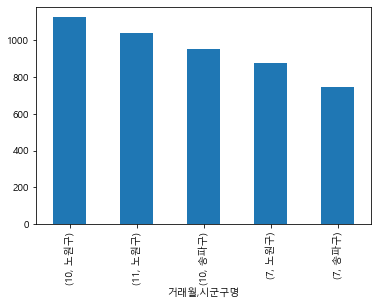

In [39]:
# 상위 5개 지역을 시각화 합니다.
df.groupby(by=['거래월', '시군구명']).size().sort_values(ascending=False).head(5).plot(kind='bar')

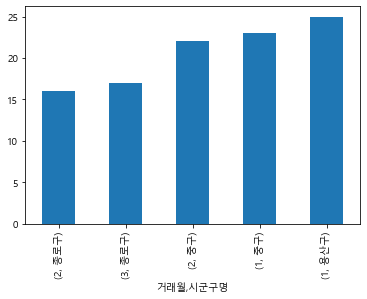

In [40]:
# 하위 5개 지역을 시각화 합니다.
df.groupby(by=['거래월', '시군구명']).size().sort_values().head(5).plot(kind='bar')

In [41]:
# pivot_table함수를 이용하여 거래월과 시군구별 평균거래금액을 계산합니다.
df.pivot_table(index='시군구명',columns='거래월',values='거래금액',aggfunc='mean')

거래월,1,2,3,4,5,6,7,8,9,10,11,12
시군구명,,,,,,,,,,,,
강남구,173070.921053,154485.714286,155681.201342,172314.655172,173994.415584,179622.363790,182229.357784,183377.857143,186570.220884,186971.604585,183688.208955,163585.454545
강동구,55055.050505,58745.333333,63475.301205,63963.522013,73785.114155,77179.108626,75460.896480,76337.146597,77380.172662,73687.599725,77346.345515,66064.537445
강북구,44962.068966,42019.117647,44155.833333,42236.226415,42077.564103,43133.793103,44789.448276,44995.703125,47281.147541,51075.053191,50545.562130,46675.252525
강서구,45096.296296,48354.794521,44992.025641,49594.326241,54949.296482,57478.900990,63041.680000,59028.466667,61646.472393,63741.793570,64955.084746,60003.146853
관악구,35048.658537,41866.250000,46528.915663,46614.431818,49132.455090,51593.169399,54023.191489,54170.390244,55570.572917,56228.736527,57812.695418,56008.108108
광진구,67265.517241,74889.285714,74380.877193,83356.000000,87293.939394,88718.253968,92066.972477,92201.675127,95700.536913,99318.691275,96088.339623,94022.857143
구로구,40017.474747,40303.571429,39370.731707,42235.916168,44917.391304,44699.288136,51912.587601,54625.263158,51885.173502,54971.795580,56395.996377,52528.693811
금천구,38075.000000,35309.347826,39189.506173,40261.728395,43190.500000,40139.062500,41080.445860,44061.843972,43595.177143,47142.390244,46496.216216,44430.128205
노원구,37882.032680,40398.958333,37998.424658,39953.438596,41157.546729,44103.690936,43824.434286,45705.457627,46019.713405,46021.877224,47509.203472,37644.178794


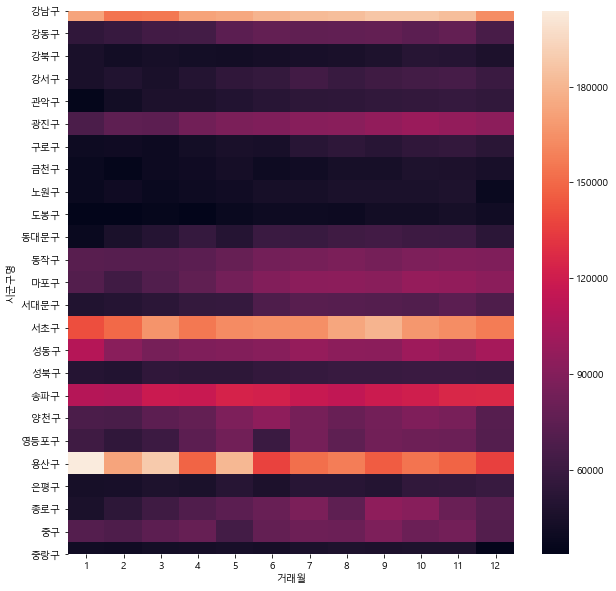

In [42]:
# 위에서 계산된 결과(평균거래금액)를 heatmap 시각화를 합니다.
plt.figure(figsize=(10,10))
sns.heatmap(df.pivot_table(index='시군구명',columns='거래월',values='거래금액',aggfunc='mean'))

In [43]:
# pivot_table함수를 이용하여 거래월과 시군구별 거래량(거래 건 수) 계산합니다.
df.pivot_table(index='시군구명',columns='거래월',values='거래금액',aggfunc='count')

거래월,1,2,3,4,5,6,7,8,9,10,11,12
시군구명,,,,,,,,,,,,
강남구,76,49,149,232,385,591,668,364,498,698,469,165
강동구,99,75,83,159,219,313,483,382,417,727,602,227
강북구,29,34,60,53,78,87,145,128,122,188,169,99
강서구,81,73,117,141,199,303,375,300,326,591,531,286
관악구,82,40,83,88,167,183,235,205,192,334,371,148
광진구,29,28,57,75,99,189,218,197,149,298,212,70
구로구,99,84,123,167,161,295,371,285,317,543,552,307
금천구,46,46,81,81,100,96,157,141,175,246,185,78
노원구,153,144,219,285,428,673,875,590,649,1124,1037,481


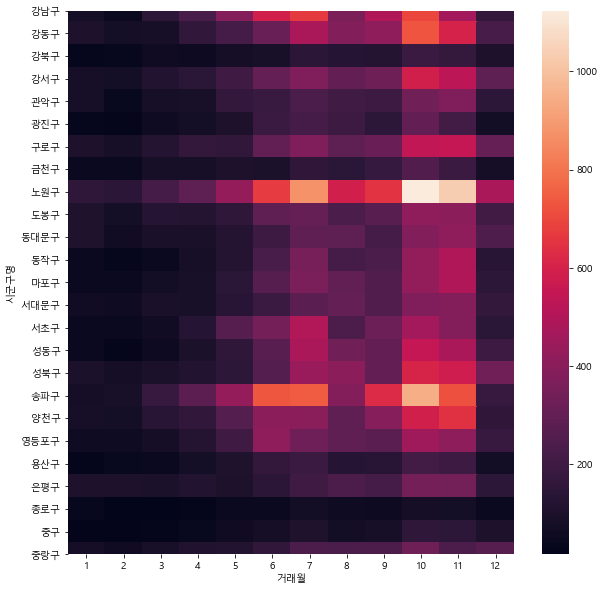

In [44]:
# 위에서 계산된 결과(거래량)를 heatmap 시각화를 합니다.
plt.figure(figsize=(10,10))
sns.heatmap(df.pivot_table(index='시군구명',columns='거래월',values='거래금액',aggfunc='count'))

In [45]:
# 시군구가 강남구인 데이터만 추출합니다.

gangnam = df[df['시군구명'] == '강남구']
gangnam.head()

,건축년도,거래년도,거래월,거래일자,법정동,거래금액,아파트이름,전용면적,층,지번,전용면적(평),전용면적(평)2,전용면적(평)3,반기,분기,평당거래금액,시도명,시군구명
55339,2005,2019,1,3,역삼동,132000,e-편한세상,59.606,14,755-4,18.03,18,"(15, 20]",상반기,1분기,7333.333333,서울특별시,강남구
55340,2004,2019,1,5,역삼동,61000,역삼동우정에쉐르1,59.810,8,826-29,18.09,18,"(15, 20]",상반기,1분기,3388.888889,서울특별시,강남구
55341,2005,2019,1,11,역삼동,132000,e-편한세상,59.606,12,755-4,18.03,18,"(15, 20]",상반기,1분기,7333.333333,서울특별시,강남구
55342,2014,2019,1,16,역삼동,19500,(735-15),15.250,14,735-15,4.61,4,"(0, 5]",상반기,1분기,4875.000000,서울특별시,강남구
55343,2014,2019,1,23,역삼동,130000,테헤란아이파크,84.641,8,709-5,25.60,25,"(20, 25]",상반기,1분기,5200.000000,서울특별시,강남구


In [46]:
# pivot_table함수를 이용하여 거래월과 법정동 평균거래금액을 계산 합니다. (NA는 0으로 치환합니다.)
gangnam.pivot_table(index='법정동',columns='거래월',values='거래금액',aggfunc='mean').fillna(0)

거래월,1,2,3,4,5,6,7,8,9,10,11,12
법정동,,,,,,,,,,,,
개포동,140074.285714,137416.666667,148865.000000,140371.052632,151024.666667,167735.761364,179489.844828,197321.000000,184425.602564,176647.702703,179266.666667,199927.586207
논현동,0.000000,106750.000000,43939.960000,82510.000000,107083.333333,108326.086957,125431.250000,112042.000000,99738.461538,142222.222222,118563.461538,95725.000000
대치동,159442.307692,183316.666667,186276.315789,204490.909091,212240.833333,208495.859375,217645.360825,241396.491228,221485.632184,228585.123967,221925.000000,157184.615385
도곡동,162372.727273,143500.000000,178033.333333,174538.461538,165126.923077,181772.435897,191756.521739,169360.655738,193900.000000,202866.326531,189454.629630,164092.592593
삼성동,203687.500000,150500.000000,173462.500000,186117.647059,201576.923077,198414.893617,189911.842105,177615.625000,175945.945946,171792.982456,193325.000000,166611.111111
세곡동,0.000000,0.000000,105000.000000,105000.000000,96600.000000,105537.500000,99354.545455,101850.000000,100436.363636,106178.571429,107981.818182,111750.000000
수서동,134500.000000,91333.333333,86000.000000,118256.250000,111635.416667,117252.380952,106152.173913,128223.076923,121682.758621,123245.454545,119408.000000,110183.333333
신사동,86000.000000,0.000000,50000.000000,75000.000000,104600.000000,106200.000000,158500.000000,177733.333333,143600.000000,106200.000000,95812.500000,105000.000000
압구정동,320785.714286,269200.000000,273666.666667,247161.111111,275846.153846,273001.785714,272745.454545,264723.809524,290970.731707,286470.149254,277909.090909,267650.000000


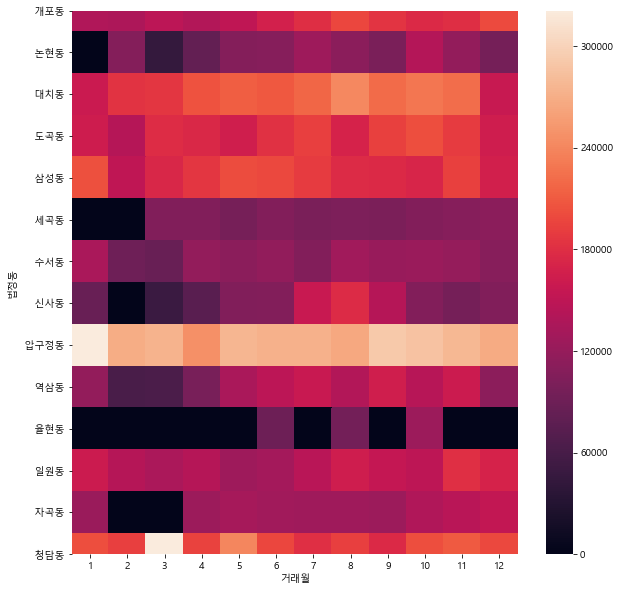

In [47]:
# 강남구 법정동 평균 거래 금액을 heatmap 시각화 합니다. 
plt.figure(figsize=(10,10))
sns.heatmap(gangnam.pivot_table(index='법정동',columns='거래월',values='거래금액',aggfunc='mean').fillna(0))

In [48]:
# 강남구의 아파트 단지별 평균 거래 금액을 계산 후 상위 5개를 출력합니다.
gangnam.groupby(by='아파트이름')['거래금액'].agg(['mean']).sort_values('mean', ascending=False).head(5)

,mean
아파트이름,
상지리츠빌카일룸2차,645000.0
삼성동상지리츠빌카일룸,533000.0
효성빌라 청담101(B동),530000.0
아펠바움,510000.0
현대65동(대림아크로빌아파트),489000.0


In [49]:
# 강남구의 아파트 단지별 평균 거래 금액을 계산 후 하위 5개를 출력합니다.
gangnam.groupby(by='아파트이름')['거래금액'].agg(['mean']).sort_values('mean').head(5)

,mean
아파트이름,
힐스테이트6,18000.000000
(735-15),19500.000000
강남역우정에쉐르,20066.666667
우림루미아트1,20250.000000
진넥스빌2,21000.000000


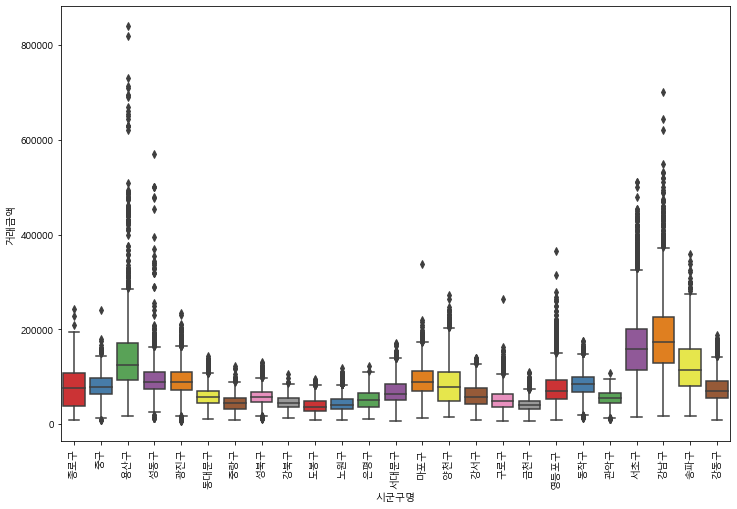

In [50]:
# 시군구별 거래 금액을 boxplot을 이용하여 시각화 해보세요.
plt.figure(figsize=(12,8))
sns.boxplot(x="시군구명", y="거래금액", data=df, palette="Set1")
plt.xticks(rotation=90)
plt.show()

In [51]:
# 평균 거래 금액이 높은 상위 30개의 아파트 단지를 추출하세요.
df.groupby('아파트이름')['거래금액'].agg(['mean']).sort_values('mean', ascending=False).head(30)

,mean
아파트이름,
상지리츠빌카일룸2차,645000.000000
삼성동상지리츠빌카일룸,533000.000000
효성빌라 청담101(B동),530000.000000
아펠바움,510000.000000
현대65동(대림아크로빌아파트),489000.000000
상지리츠빌 카일룸,469333.333333
상지리츠빌카일룸3차,456400.000000
연세리버테라스,440000.000000
한남더힐,426163.716814


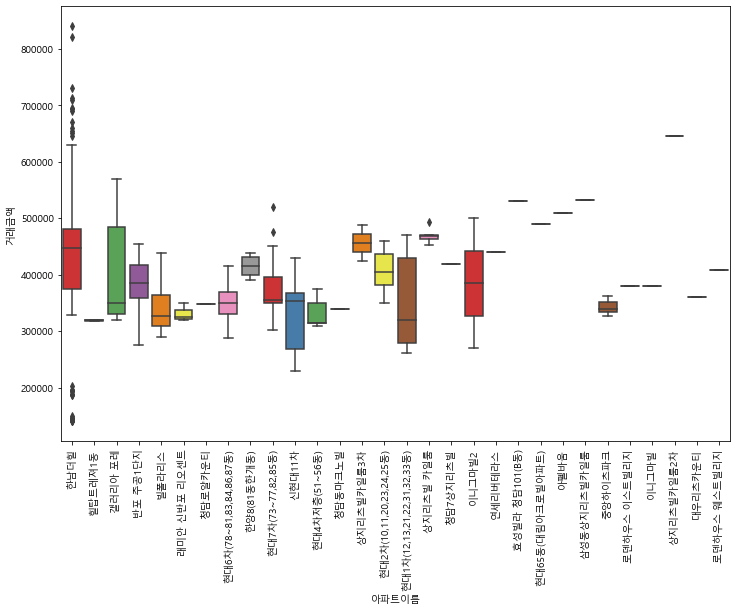

In [52]:
# 평균 거래 금액이 높은 상위 30개의 아파트 단지에 해당하는 거래 데이터를 이용하여 boxplot을 그려보세요.

apt_nm = df.groupby('아파트이름')['거래금액'].agg(['mean']).sort_values('mean', ascending=False).head(30).index

temp = df[df['아파트이름'].isin(apt_nm)]

plt.figure(figsize=(12,8))
sns.boxplot(x="아파트이름", y="거래금액", data=temp, palette="Set1")
plt.xticks(rotation=90)
plt.show()

In [53]:
# 평균 거래량(거래건수)이 높은 상위 30개의 아파트 단지를 추출하세요.
df.groupby('아파트이름')['거래금액'].agg(['count']).sort_values('count', ascending=False).head(30)

,count
아파트이름,
현대,637
두산,538
한신,487
삼성래미안,441
벽산,425
신동아,419
파크리오,388
우성,351
삼성,327


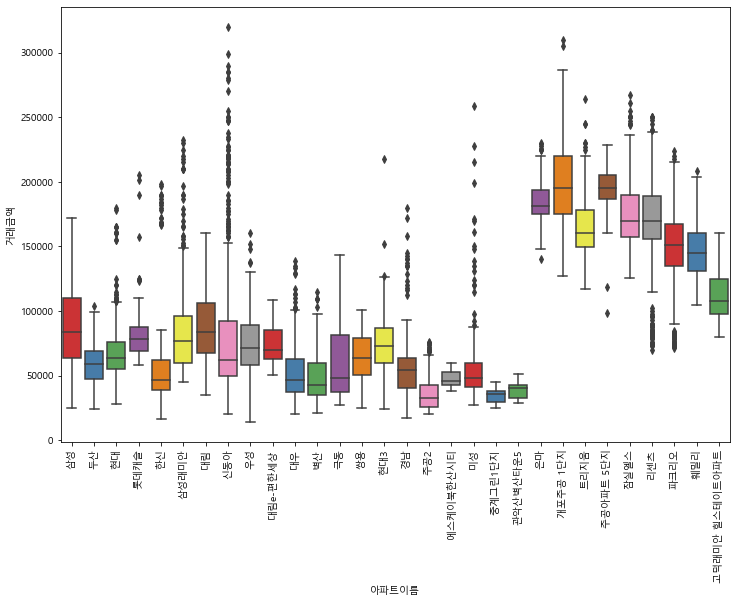

In [54]:
# 평균 거래량 높은 상위 30개의 아파트 단지에 해당하는 거래 데이터를 이용하여 boxplot을 그려보세요.

apt_nm = df.groupby('아파트이름')['거래금액'].agg(['count']).sort_values('count', ascending=False).head(30).index

temp = df[df['아파트이름'].isin(apt_nm)]

plt.figure(figsize=(12,8))
sns.boxplot(x="아파트이름", y="거래금액", data=temp, palette="Set1")
plt.xticks(rotation=90)
plt.show()